In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the pre-scraped data

In [266]:
df = pd.read_excel("chess.xlsx")

## (EDA) & Preprocessing

In [267]:
df.drop("Href",axis=1,inplace=True)

In [268]:
df["MoveCount"] = df['MoveCount'].astype(int)

In [269]:
df.head()

,Result,MoveCount,Date,Moves,Blunders,Mistakes,Misses,Player,RatingO,RatingM,AccuracyO,AccuracyM,Evals,allMoves,Hour,Opening
0,Won,18,"Sep 18, 2023","e4,Nf3,Bc4,d4,exd5,Nxd4,Qxd4,O-O,d6,Qd3,Re1+,N...",NaN,NaN,"10,13",white,1094,1331,39.4,61.8,"0.18525,0.247,0.247,1.482,1.482,1.66725,1.6672...",1. e4 e5 2. Nf3 f6 $2 3. Bc4 Nc6 4. d4 d5 $6 5...,12,Kings-Pawn-Opening-Kings-Knight-Damiano-Defense
1,Won,64,"Sep 18, 2023","c6,d5,cxd5,Nf6,Nxd5,Nxc3,Bg4,e6,Bh5,Nc6,Bg6,hx...",15,8,NaN,black,1325,1451,80.4,89.7,"0.18525,0.43225,0.43225,0.43225,0.18525,0.1852...",1. e4 c6 2. Nf3 d5 3. exd5 cxd5 4. c4 Nf6 5. c...,12,Caro-Kann-Defense-Accelerated-Panov-Modern-Var...
2,Lost,19,"Sep 18, 2023","e4,Nf3,Bc4,d4,Nxd4,Qxd4,O-O,Re1,Nc3,Bf4,Bxe6,Q...",19,"8,18","11,16",white,1495,1371,66.9,60.4,"0.18525,0.18525,0.18525,0.18525,0.18525,0.741,...",1. e4 e5 2. Nf3 Nc6 3. Bc4 h6 $6 4. d4 exd4 5....,13,Italian-Game-Anti-Fried-Liver-Defense
3,Won,37,"Sep 18, 2023","d5,Nf6,Nc6,e5,Bd6,Bf5,e4,bxc6,O-O,h5,c5,Bg6,h4...",NaN,"16,23","22,28",black,1394,1449,64.9,69.9,"0.06175,0.247,0.0,0.1235,-0.80275,-0.3705,-1.0...",1. d4 d5 2. e3 Nf6 3. f3 $6 Nc6 4. c3 $6 e5 5....,13,Indian-Game-2.e3-d5
4,Won,26,"Sep 18, 2023","e4,Nf3,d3,d4,Nxd4,Nc3,Bc4,Be3,Qf3,Bb3,Nde2,Bb6...",12,10,11,white,1499,1519,64.4,79.4,"0.18525,0.247,0.247,0.3705,0.0,0.247,0.06175,0...",1. e4 e5 2. Nf3 d6 3. d3 Be7 4. d4 exd4 5. Nxd...,13,Philidor-Defense


In [270]:
df.isna().sum()

Result         0
MoveCount      0
Date           0
Moves          0
Blunders     113
Mistakes      85
Misses       152
Player         0
RatingO        0
RatingM        0
AccuracyO      0
AccuracyM      0
Evals          0
allMoves       0
Hour           0
Opening        0
dtype: int64

They are NULL since they don't have to exist in a particular game

In [271]:
df = df.fillna('')

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Result     282 non-null    object 
 1   MoveCount  282 non-null    int32  
 2   Date       282 non-null    object 
 3   Moves      282 non-null    object 
 4   Blunders   282 non-null    object 
 5   Mistakes   282 non-null    object 
 6   Misses     282 non-null    object 
 7   Player     282 non-null    object 
 8   RatingO    282 non-null    int64  
 9   RatingM    282 non-null    int64  
 10  AccuracyO  282 non-null    float64
 11  AccuracyM  282 non-null    float64
 12  Evals      282 non-null    object 
 13  allMoves   282 non-null    object 
 14  Hour       282 non-null    int64  
 15  Opening    282 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(10)
memory usage: 34.3+ KB


In [273]:
df["Date"] = pd.to_datetime(df['Date'])

Seperating the type of games

In [274]:
df['GameType'] = np.where((df['RatingM'] >= 1451) | (df['RatingM'] == 1331) | (df['RatingM'] == 1371)| (df['RatingM'] == 1449), 'Rapid', 'Blitz')

In [275]:
df['Hour'] = df['Hour'] % 24

In [276]:
df["GameType"].value_counts()

GameType
Blitz    239
Rapid     43
Name: count, dtype: int64

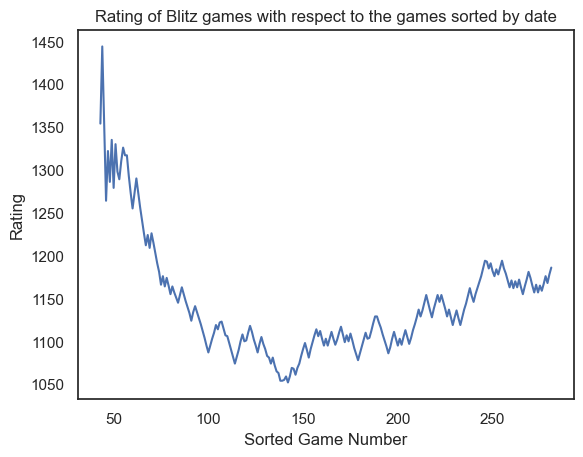

In [277]:

blitz_data = df[df['GameType'] == 'Blitz']
plt.plot(blitz_data['RatingM'])
plt.title('Rating of Blitz games with respect to the games sorted by date')
plt.xlabel('Sorted Game Number')
plt.ylabel('Rating')

plt.show()

In [278]:



def find_outliers(data):
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = [value for value in data if value < lower_bound or value > upper_bound]

    return (outliers)

def detect_sudden_changes(sorted_numbers, threshold):
    changes = 0

    for i in range(1, len(sorted_numbers)):
        diff = sorted_numbers[i] - sorted_numbers[i - 1]

        # Check if the difference exceeds the threshold
        if abs(diff) > threshold:
            changes+=1

    return changes





In [279]:
import statistics
def findGameType(rw):

    data_ = rw["Evals"].split(',')
    float_data_ = [float(value) for value in data_]
    mean = statistics.mean(float_data_)
    sudden_changes = detect_sudden_changes(float_data_,2)
    if abs(mean) > 0.7 and sudden_changes <=4:
        return "Easy"
    elif sudden_changes >=2 and len(find_outliers(float_data_)) >= 4:
        return "Wild"
    else:
        return "Mild"

Determining the type of the game

In [280]:
df['GameChar'] = df.apply(findGameType, axis=1)
df["Opening2"] = df["Opening"].str.split('-').str[0]

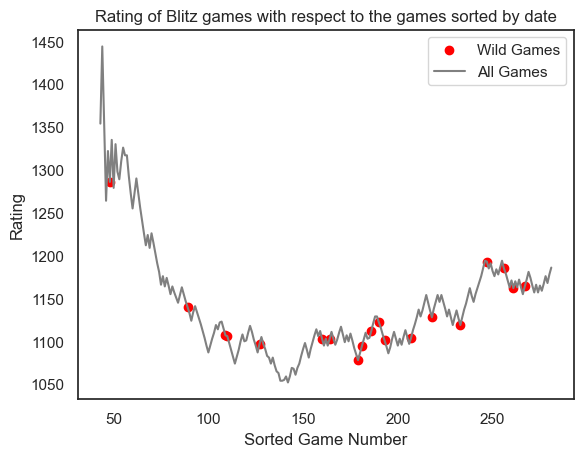

In [281]:
import matplotlib.pyplot as plt

# Assuming "GameMODE" is a column in your DataFrame
wild_data = df[(df['GameType'] == 'Blitz') & (df['GameChar'] == 'Wild')]

blitz_data = df[df['GameType'] == 'Blitz']



# Plotting dots for "Wild" games
plt.scatter(wild_data.index,wild_data['RatingM'], label='Wild Games', color='red', marker='o')

# Plotting all data
plt.plot(blitz_data['RatingM'], label='All Games', color='gray')

# Add title and labels
plt.title('Rating of Blitz games with respect to the games sorted by date')
plt.xlabel('Sorted Game Number')
plt.ylabel('Rating')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [282]:
wild_data["Result"].value_counts()

Result
Lost    12
Won      6
Draw     1
Name: count, dtype: int64

Seems like playing wild caused more losses than wins and does not correlate with the downfall of first 150 games

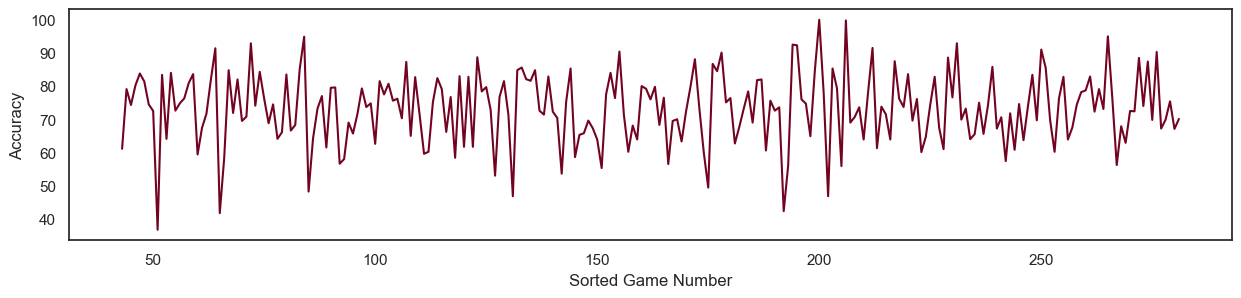

In [379]:

blitz_data = df[df['GameType'] == 'Blitz']
fig,ax = plt.subplots(figsize=(15,3))
ax.plot(blitz_data['AccuracyO'])
plt.xlabel("Sorted Game Number")
plt.ylabel("Accuracy")
plt.show()

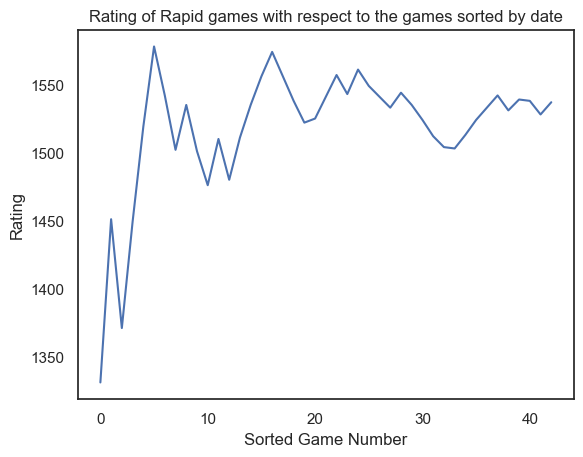

In [284]:
rapid_data = df[df['GameType'] == 'Rapid']
plt.plot(rapid_data['RatingM'])
plt.title('Rating of Rapid games with respect to the games sorted by date')
plt.xlabel('Sorted Game Number')
plt.ylabel('Rating')
plt.show()

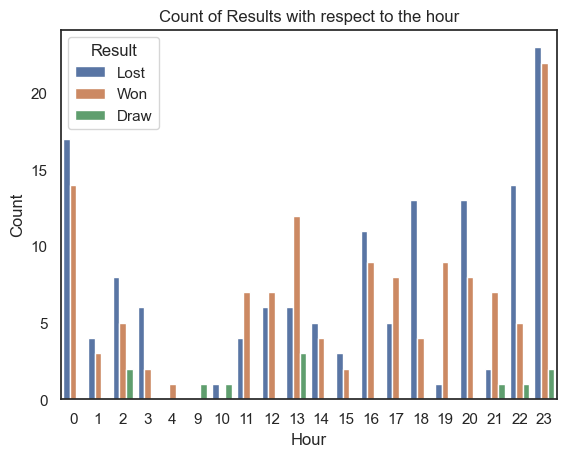

In [285]:

# Plotting the count of 'win' values for the filtered data
sns.countplot(x='Hour', hue='Result', data=df)
plt.title('Count of Results with respect to the hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

Seems like 13 is the prime hour for winning 
23.00- 01.00 is the most played hours

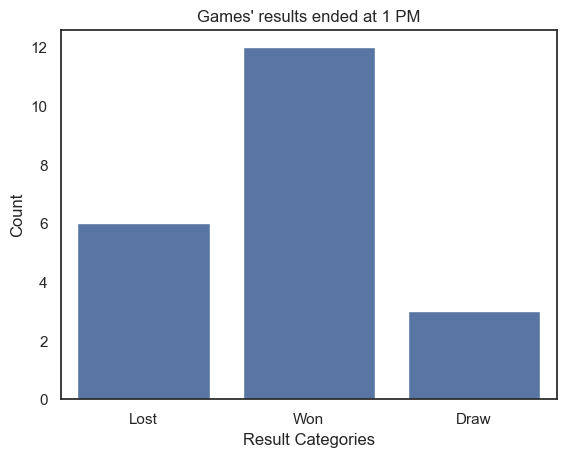

In [286]:
hour_data = df[df["Hour"] == 13]
sns.countplot(x='Result', data=hour_data)
plt.title('Games\' results ended at 1 PM')
plt.xlabel('Result Categories')
plt.ylabel('Count')
plt.show()

In [287]:
df['Win'] = df['Result'].apply(lambda x: 1 if x == 'Won' else 0)

In [288]:
df["Opening"].value_counts()

Opening
Scandinavian-Defense-2.e5                                                 15
Italian-Game-Anti-Fried-Liver-Defense                                     12
Alekhines-Defense-Scandinavian-Variation-3.exd5-Nxd5-4.Nxd5-Qxd5-5.Nf3    11
Philidor-Defense-3.Bc4                                                     9
Reti-Opening-Tennison-Gambit                                               9
                                                                          ..
Alekhines-Defense-Scandinavian-Variation-3.exd5-Nxd5                       1
Scandinavian-Defense-Modern-Marshall-Variation                             1
Italian-Game-Fried-Liver-Attack                                            1
English-Opening-Anglo-Scandinavian-Defense-2.cxd5-Qxd5-3.Nc3               1
Closed-Sicilian-Defense-Traditional-Line...4.Bc4-Bg7-5.O-O-d6              1
Name: count, Length: 159, dtype: int64

In [289]:
df['FirstBlunder'] = df['Blunders'].str.split(',').str[0]

df.loc[df['FirstBlunder'] == '', 'FirstBlunder'] = -1
df["FirstBlunder"] = df['FirstBlunder'].astype(int)
df['MidGameBlunder'] = np.where((df['FirstBlunder'] > 12) & (df['FirstBlunder'] < 25), 1, 0)

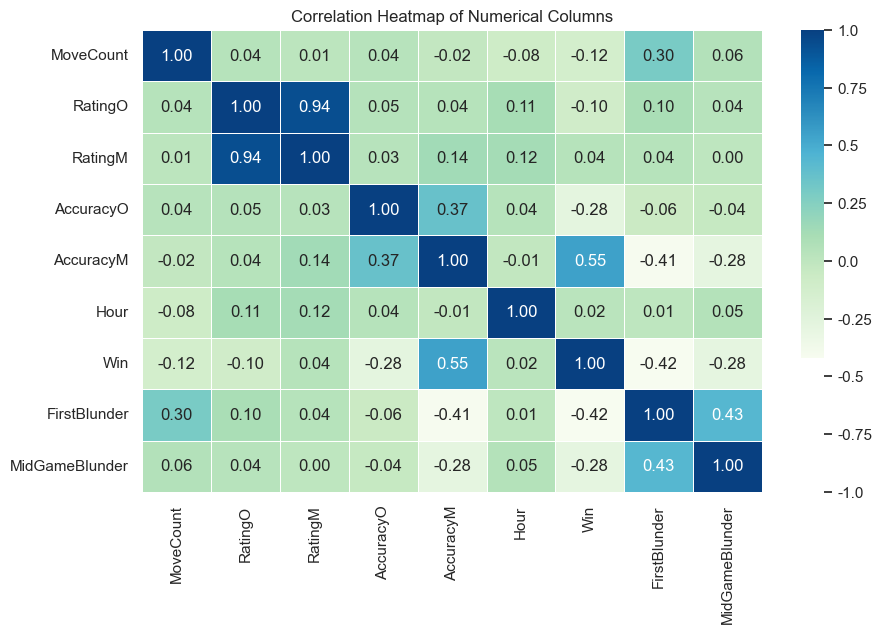

In [290]:
# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the plot with a larger figure size and a more visually appealing color map
plt.figure(figsize=(10, 6))
sns.set(style="white")  # Set the style to white background


heatmap = sns.heatmap(correlation_matrix, cmap='GnBu', annot=True, fmt=".2f", linewidths=0.5)

# Add a color bar for better interpretation
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['-1.0', '-0.75', '-0.5', '-0.25', '0.0', '0.25', '0.5', '0.75', '1.0'])

# Add title and display the plot
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_21440\2850695261.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  price_plt = sns.kdeplot(df['RatingM'], shade=True)


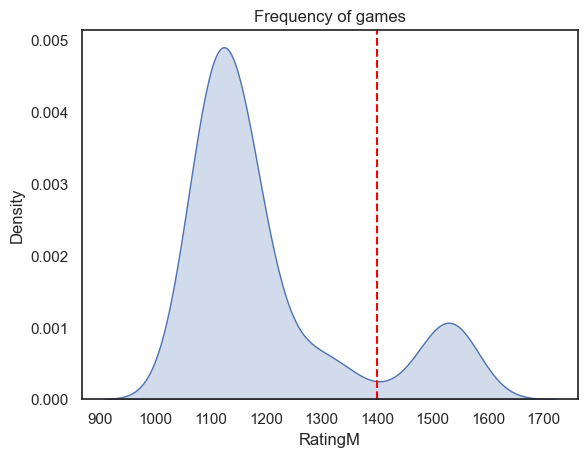

In [291]:

price_plt = sns.kdeplot(df['RatingM'], shade=True)
title = price_plt.set_title("Frequency of games")
plt.axvline(x=1400, color='red', linestyle='--', label='Blitz and Rapid Threshold')

In [292]:
df["Opening"].str.startswith("Caro-Kann").value_counts()

Opening
False    254
True      28
Name: count, dtype: int64

In [293]:
def extract_first_blundered_piece(row):
    blunders = row['Moves'].split(',')
    first_blunder_index = int(row['FirstBlunder'])
    
    
    if 0 <= first_blunder_index < len(blunders):
        return blunders[first_blunder_index-1]
    else:
        return None

# Apply the function to create a new column 'FirstBlunderedPiece'
df['FirstBlunderedPiece'] = df.apply(extract_first_blundered_piece, axis=1)

In [294]:
df["FirstBlunderedPiece"].value_counts()

FirstBlunderedPiece
e5       4
Re1      4
Nxd4     4
e6       3
Nxf7     3
        ..
Kd7      1
Nf5      1
Bxc3     1
Qxc7+    1
Qc4      1
Name: count, Length: 113, dtype: int64

(282, 23)

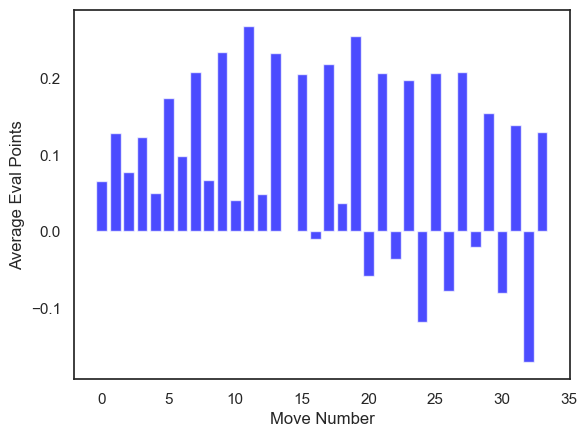

In [295]:
moveN = 34

sum_arr =  [0] * moveN

for index, row in df.iterrows():

    
    data3 = row["Evals"].split(',')
    float_data3 = [float(value) for value in data3]
    #print(statistics.mean(float_data3),detect_sudden_changes(float_data3,2),find_outliers(float_data3))
    #print(float_data3)
    if len(float_data3) >= moveN:
        data_30 = float_data3[:moveN]
        sum_arr = [a + b for a, b in zip(data_30, sum_arr)]
        

avg_eval_moves = [i/282 for i in sum_arr]
plt.bar(range(len(avg_eval_moves)), avg_eval_moves, color='blue', alpha=0.7)

plt.xlabel('Move Number')
plt.ylabel('Average Eval Points')




df.shape

This concludes that things generally start to go upside down after move 20

In [296]:
df["MoveCount"].mean()

32.99290780141844

In [297]:
evals_df = df['Evals'].str.split(',', expand=True).astype(float)

sum_evals = evals_df.sum(axis=1)

# Add the result to the original DataFrame
df['Sum_Evals'] = sum_evals.apply(lambda x: x/282)

# Display the updated DataFrame
print(df["Sum_Evals"])

0      0.145178
1      0.636988
2      0.061750
3     -0.217877
4     -0.076640
         ...   
277    0.009197
278   -0.032189
279    0.315538
280    0.240212
281    0.005912
Name: Sum_Evals, Length: 282, dtype: float64


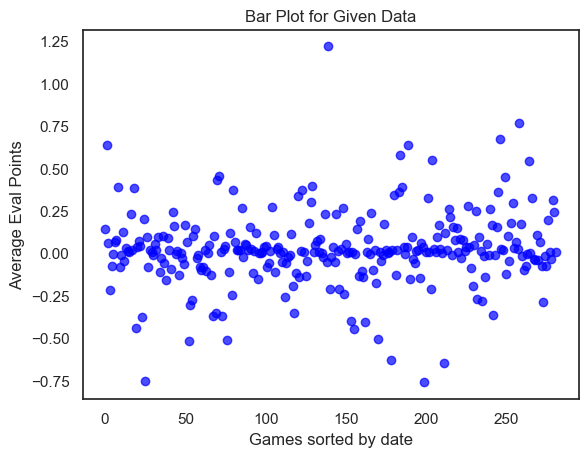

In [298]:


# Create a bar plot
plt.scatter(range(len(df["Sum_Evals"])),df["Sum_Evals"], color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Games sorted by date')
plt.ylabel('Average Eval Points')
plt.title('Bar Plot for Given Data')

# Show the plot
plt.show()

In [299]:
def findGameType(rw):

    data_ = rw["Evals"].split(',')
    float_data_ = [float(value) for value in data_]
    mean = statistics.mean(float_data_)
    sudden_changes = detect_sudden_changes(float_data_,2)
    if abs(mean) > 0.7 and sudden_changes <=4:
        return "Easy"
    elif sudden_changes >=2 and len(find_outliers(float_data_)) >= 4:
        return "Wild"
    else:
        return "Mild"

In [300]:
df['GameChar'] = df.apply(findGameType, axis=1)
df["Opening2"] = df["Opening"].str.split('-').str[0]

In [301]:
df["GameChar"].value_counts()

GameChar
Mild    142
Easy    120
Wild     20
Name: count, dtype: int64

In [302]:
df["RatingDiff"] = df["RatingM"] - df["RatingO"]

In [303]:
blitz_data = df[df['GameType'] == 'Blitz']
df_147 = blitz_data[:100]
df_148_282 = blitz_data[100:282]

In [304]:
df_147["Result"].value_counts()

Result
Lost    62
Won     33
Draw     5
Name: count, dtype: int64

In [305]:
df_148_282["Result"].value_counts()

Result
Won     75
Lost    61
Draw     3
Name: count, dtype: int64

Opening columns show Openings or Defenses so it depends on the color of the player

In [306]:
df_white = df[df["Player"]=="white"]
df_white["Opening2"].value_counts()

Opening2
Italian         30
Philidor        17
Sicilian        13
Giuoco          13
French          12
Pirc            11
Scandinavian    10
Closed           9
Caro             8
Modern           6
Reti             3
Owens            2
Bishops          2
Danish           1
Petrovs          1
Scotch           1
Queens           1
Kings            1
Name: count, dtype: int64

In [307]:
df_white[df_white["Opening2"] == "Sicilian"]["Result"].value_counts()

Result
Lost    9
Draw    2
Won     2
Name: count, dtype: int64

In [308]:
df_white[df_white["Opening2"] == "Scandinavian"]["Result"].value_counts()

Result
Lost    6
Won     4
Name: count, dtype: int64

Looks like Sicilian is the 3rd most faced and lost against game when playing as white

In [309]:
df_white["Opening2"].value_counts()

Opening2
Italian         30
Philidor        17
Sicilian        13
Giuoco          13
French          12
Pirc            11
Scandinavian    10
Closed           9
Caro             8
Modern           6
Reti             3
Owens            2
Bishops          2
Danish           1
Petrovs          1
Scotch           1
Queens           1
Kings            1
Name: count, dtype: int64

In [310]:
df_black = df[df["Player"]=="black"]
df_black["Opening2"].value_counts()

Opening2
Scandinavian    37
Queens          31
Alekhines       25
Caro            20
English          6
Reti             6
Kings            5
Nimzowitsch      3
Van              3
Indian           1
Kadas            1
Four             1
Italian          1
Mieses           1
Name: count, dtype: int64

In [311]:
sicilian_data = df[df["Opening2"] == "Sicilian"]

In [312]:
sicilian_data["Result"].value_counts()

Result
Lost    9
Draw    2
Won     2
Name: count, dtype: int64

In [313]:
df["MissesCount"] = df["Misses"].apply(lambda x: len(x.split(",")) if x else 0)

In [314]:
df_diffn50 = df[(df["RatingDiff"] < 0) & (df["RatingDiff"] > -50)]
df_diffp50 = df[(df["RatingDiff"] > 0) & (df["RatingDiff"] < 50)]

In [315]:
df_diffn50["Result"].value_counts()

Result
Lost    65
Won     35
Draw     5
Name: count, dtype: int64

In [316]:
df_diffn50["AccuracyO"].mean()

73.14666666666666

In [317]:
df_diffp50["AccuracyO"].mean()

74.57244897959183

In [318]:
df_diffp50["Result"].value_counts()

Result
Won     58
Lost    35
Draw     5
Name: count, dtype: int64

In [319]:
df[(df["RatingDiff"] > 0) & (df["RatingDiff"] < 50)]["AccuracyO"].mean()

74.57244897959183

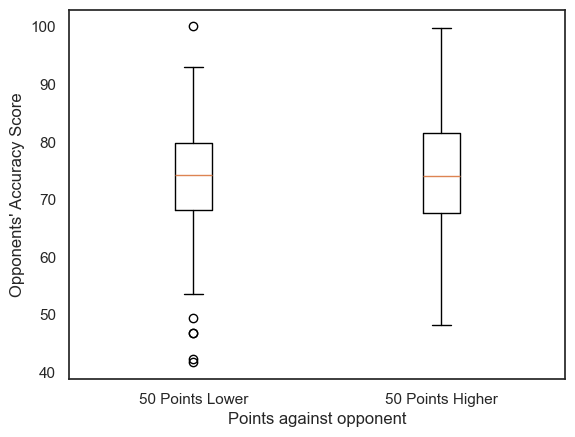

In [320]:
import matplotlib.pyplot as plt
import numpy as np

# Generating sample data
data1 = df_diffn50["AccuracyO"]
data2 = df_diffp50["AccuracyO"]  # Adding a constant to shift the second variable

# Creating a boxplot
plt.boxplot([data1, data2], labels=['50 Points Lower', '50 Points Higher'])

# Adding labels and title
plt.xlabel('Points against opponent')
plt.ylabel('Opponents\' Accuracy Score')


# Displaying the plot
plt.show()


Since 50 point difference is basically nothing for any game above 1100 rating and opponents accuracy is even slightly lower when losing more its looking more of a psychological effect causing the result

In [321]:
df_diffn50.head()

,Result,MoveCount,Date,Moves,Blunders,Mistakes,Misses,Player,RatingO,RatingM,...,GameType,GameChar,Opening2,Win,FirstBlunder,MidGameBlunder,FirstBlunderedPiece,Sum_Evals,RatingDiff,MissesCount
7,Lost,30,2023-09-18,"e4,Nf3,Bc4,d4,Nxd4,Bb3,Nc3,Bf4,Qe2,Nf5,Bxc4,Qx...","26,27","16,21",,white,1544,1502,...,Rapid,Easy,Italian,0,26,0,Rf1,0.076202,-42,0
9,Lost,46,2023-09-18,"c6,d5,cxd5,Nc6,Nf6,e5,Be7,Bxf6,h5,Qe7,Qe6,Bxe6...","10,30","26,28",,black,1531,1501,...,Rapid,Mild,Caro,0,10,0,Qe7,-0.078830,-30,0
11,Won,22,2023-09-18,"e4,Nf3,Bc4,Nxd4,O-O,Qh5,Qd5,d3,Qxd4,Qd6,Qg3,Qf...",,,,white,1555,1510,...,Rapid,Easy,Italian,1,-1,0,None,0.125471,-45,0
17,Lost,23,2023-09-18,"e4,Nf3,d4,Nxd4,Bg5,Nc3,Bh4,Bc4,f3,Qe2,Nxc6,O-O...",22,8,,white,1595,1556,...,Rapid,Mild,Philidor,0,22,1,exd5,0.019488,-39,0
18,Lost,38,2023-09-18,"c6,d5,Bf5,Nxc6,Ne5,Nf6,Nfd7,Nxf3+,Bxc2,a6,Qxd7...",12,"3,7,24",,black,1585,1538,...,Rapid,Easy,Caro,0,12,0,exd6,0.385390,-47,0


## HYPOTHESIS TESTING

In [322]:
def categorize_time(hour):
    if 1 <= hour <= 3:
        return 'Mid-Night'
    elif 3 <= hour <= 13:
        return 'Morning-Noon'
    elif 13 <= hour <= 22:
        return 'Noon-Night'
    else:
        return 'Mid-Night' 

# Apply the function to create the 'TimeOfDay' column
df['TimeOfDay'] = df['Hour'].apply(categorize_time)

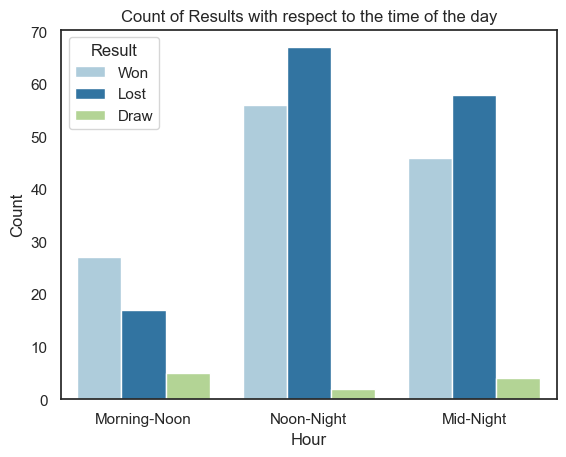

In [323]:
# Plotting the count of 'win' values for the filtered data
sns.set_palette("Paired")
sns.countplot(x='TimeOfDay', hue='Result', data=df)
plt.title('Count of Results with respect to the time of the day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

Is there a relationship between time of the day and result of the game?

## CHI-SQUARE TEST 

In [324]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Result'], df['TimeOfDay'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05  # significance level
print(f"\nSignificance level: {alpha}")
if p < alpha:
    print("We reject the null hypothesis. There is a significant association between Result and TimeOfDay.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Result and TimeOfDay.")

Chi-square value: 10.783628571208
P-value: 0.029106431026284182

Significance level: 0.05
We reject the null hypothesis. There is a significant association between Result and TimeOfDay.


In [325]:
df['Win'] = df['Result'].apply(lambda x: 1 if x == 'Won' else 0)

<Axes: >

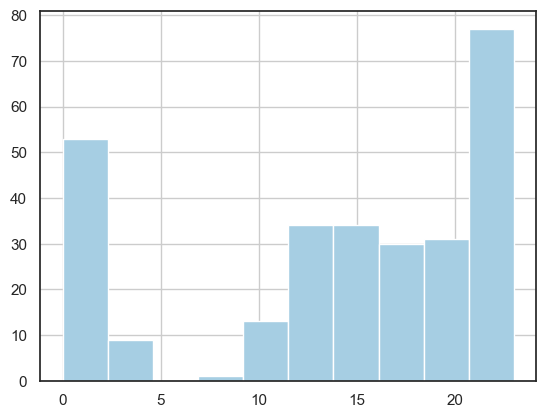

In [326]:
df["Win"].value_counts()
df["Hour"].hist()

In [327]:
contingency_table = pd.crosstab(df['Result'], df['Opening'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05  # significance level
print(f"\nSignificance level: {alpha}")
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between Result and TimeOfDay.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Result and TimeOfDay.")

Chi-square value: 341.44010213500883
P-value: 0.1556844678721068

Significance level: 0.05
Fail to reject the null hypothesis. There is no significant association between Result and TimeOfDay.


In [328]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming 'Result' is the categorical variable and 'Hour' is the numerical variable
# Replace 'your_dataframe.csv' with the actual filename

# Perform ANOVA test
result_groups = [df[df['Result'] == category]['Hour'] for category in df['Result'].unique()]
f_statistic, p_value = f_oneway(*result_groups)

# Display the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the means.")


F-statistic: 0.0973275247109595
P-value: 0.9072895973678237
Fail to reject the null hypothesis. There is no significant difference in the means.


In [329]:
italian_alike = df['Moves'].str.startswith('e4,Nf3,Bc4')
italian_alike_black = df['Moves'].str.startswith('d5,Nc6,Bf5')

In [330]:
italian_alike.value_counts()

Moves
False    219
True      63
Name: count, dtype: int64

In [331]:
#df_italian_alike = df[(italian_alike | italian_alike_black) &( df["GameType"]=="Blitz")]
df_italian_alike = df[(italian_alike | italian_alike_black)]
df_not_italian_alike = df[~(italian_alike | italian_alike_black)]

In [332]:
df_italian_alike.shape

(73, 27)

In [333]:
df["Result"].value_counts()

Result
Lost    142
Won     129
Draw     11
Name: count, dtype: int64

In [334]:
df["GameChar"].value_counts()

GameChar
Mild    142
Easy    120
Wild     20
Name: count, dtype: int64

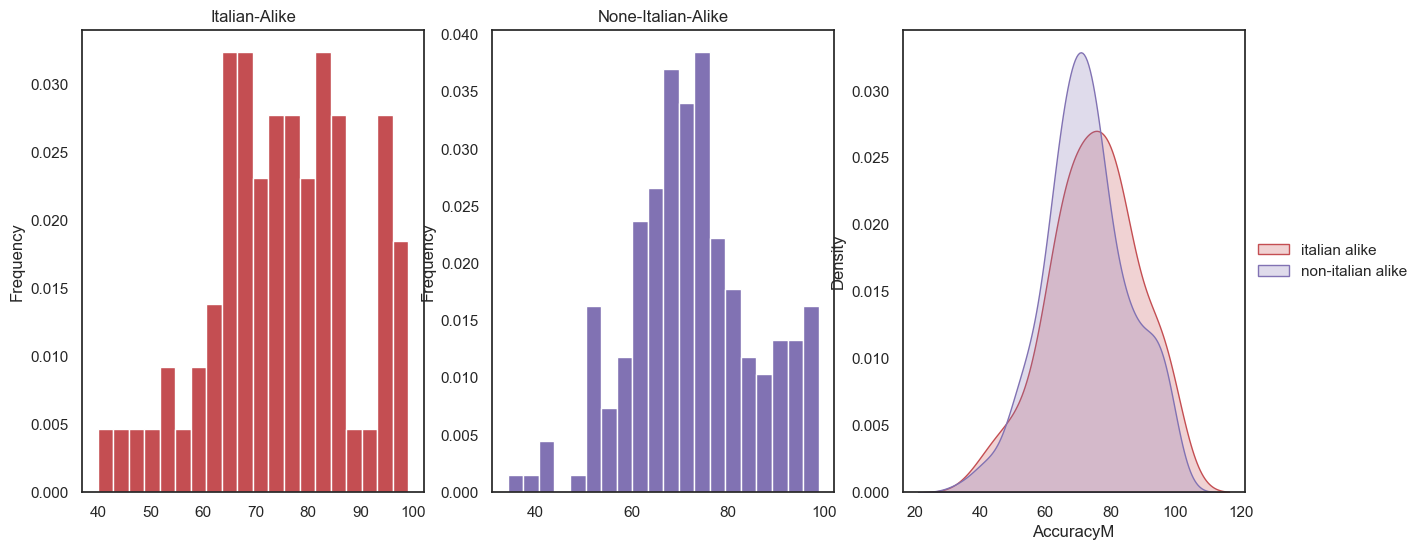

In [335]:

fig, ax = plt.subplots(1, 3, figsize=(15,6))

df_italian_alike["AccuracyM"].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="r", density=True)
ax[0].set_title("Italian-Alike")

df_not_italian_alike["AccuracyM"].plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("None-Italian-Alike")
sns.kdeplot(df_italian_alike["AccuracyM"], fill=True, label="italian alike", color="r")
sns.kdeplot(df_not_italian_alike["AccuracyM"], fill=True, label="non-italian alike", color="m")
plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

## Two Sampled T-TEST 

In [336]:
from scipy import stats
stats.ttest_ind(df_italian_alike["AccuracyM"], df_not_italian_alike["AccuracyM"], equal_var=False)

TtestResult(statistic=1.266121271375781, pvalue=0.20791568931656765, df=120.31374888270913)

P value greater than 0.05 => It shows that there is not enough difference between means of italian-alike and not alike games

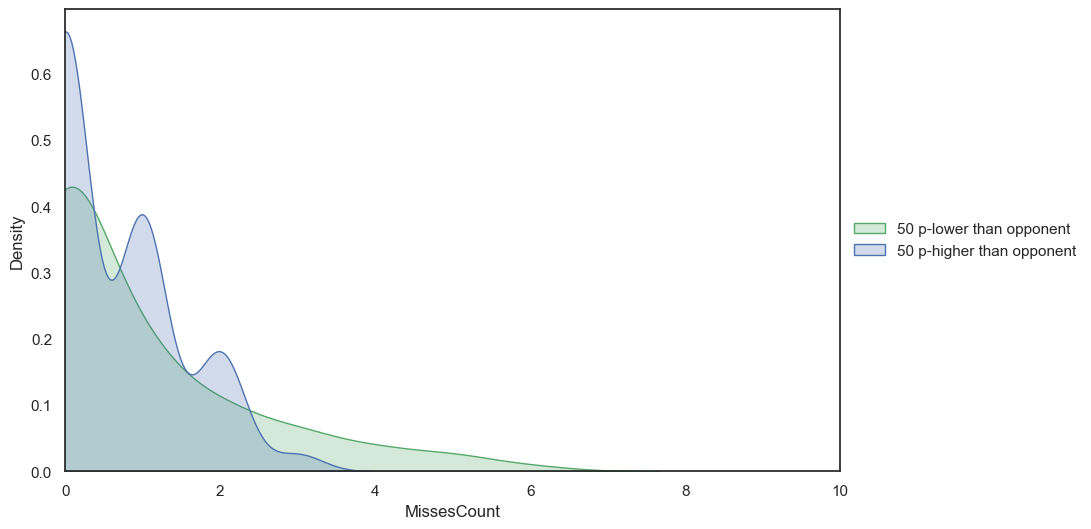

In [337]:

fig, ax = plt.subplots( figsize=(10,6))

sns.kdeplot(df_diffn50["MissesCount"], fill=True, label="50 p-lower than opponent", color="g")
sns.kdeplot(df_diffp50["MissesCount"], fill=True, label="50 p-higher than opponent", color="b")
plt.xlim([0,10])
plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)
plt.show()

In [338]:
from scipy import stats
stats.ttest_ind(df_diffp50["MissesCount"], df_diffn50["MissesCount"], equal_var=False)

TtestResult(statistic=-1.938078764762423, pvalue=0.054298758097249836, df=167.14178023151214)

## Whittney U Test

Mann-Whitney U Statistic: 8499.5
P-value: 0.1467144673606748
Fail to reject the null hypothesis. There is no significant difference between the groups.


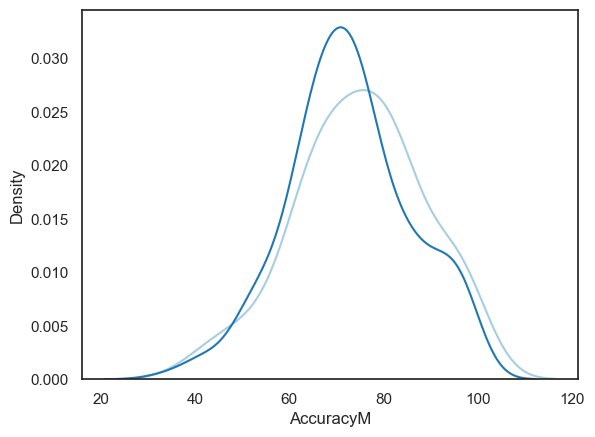

In [339]:
from scipy.stats import mannwhitneyu

# Example data
group_a = df_italian_alike["AccuracyM"]
group_b = df_not_italian_alike["AccuracyM"]

# Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_a, group_b)
sns.kdeplot(group_a)
sns.kdeplot(group_b)
# Display the results
print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


## ML Applications

In [340]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset into a pandas DataFrame


# Split the dataset into features (X) and target variable (y)
X = df[["FirstBlunder"]]
y = df["Win"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
log_reg = LogisticRegression()

# Fit the model with the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.6842105263157895


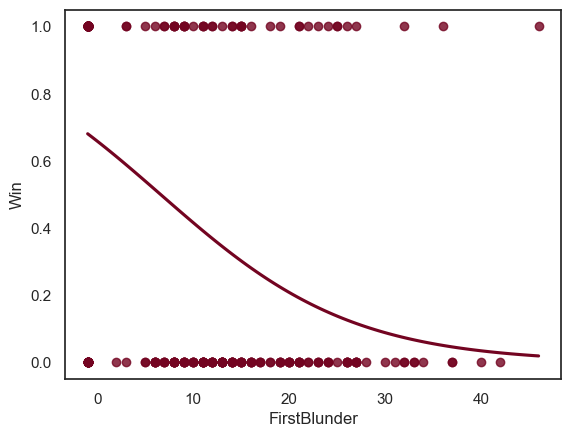

In [341]:
import statsmodels
x = df['FirstBlunder']
y = df['Win']
sns.set_palette("RdBu",54)
#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, ci=None,logistic=True)
plt.show()

In [342]:
df

,Result,MoveCount,Date,Moves,Blunders,Mistakes,Misses,Player,RatingO,RatingM,...,GameChar,Opening2,Win,FirstBlunder,MidGameBlunder,FirstBlunderedPiece,Sum_Evals,RatingDiff,MissesCount,TimeOfDay
0,Won,18,2023-09-18,"e4,Nf3,Bc4,d4,exd5,Nxd4,Qxd4,O-O,d6,Qd3,Re1+,N...",,,"10,13",white,1094,1331,...,Easy,Kings,1,-1,0,None,0.145178,237,2,Morning-Noon
1,Won,64,2023-09-18,"c6,d5,cxd5,Nf6,Nxd5,Nxc3,Bg4,e6,Bh5,Nc6,Bg6,hx...",15,8,,black,1325,1451,...,Easy,Caro,1,15,1,e5,0.636988,126,0,Morning-Noon
2,Lost,19,2023-09-18,"e4,Nf3,Bc4,d4,Nxd4,Qxd4,O-O,Re1,Nc3,Bf4,Bxe6,Q...",19,"8,18","11,16",white,1495,1371,...,Easy,Italian,0,19,1,None,0.061750,-124,2,Morning-Noon
3,Won,37,2023-09-18,"d5,Nf6,Nc6,e5,Bd6,Bf5,e4,bxc6,O-O,h5,c5,Bg6,h4...",,"16,23","22,28",black,1394,1449,...,Easy,Indian,1,-1,0,None,-0.217877,55,2,Morning-Noon
4,Won,26,2023-09-18,"e4,Nf3,d3,d4,Nxd4,Nc3,Bc4,Be3,Qf3,Bb3,Nde2,Bb6...",12,10,11,white,1499,1519,...,Easy,Philidor,1,12,0,Bb6,-0.076640,20,1,Morning-Noon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Won,14,2024-01-12,"e4,Nf3,Bc4,c3,d4,cxd4,Nc3,O-O,bxc3,d5,Nxe5,Qe1...",,,12,white,1144,1167,...,Mild,Giuoco,1,-1,0,None,0.009197,23,1,Morning-Noon
278,Won,28,2024-01-12,"e4,Nf3,Bc4,c3,d4,cxd4,Nc3,O-O,bxc3,Qb3,Qb4,Qxc...",15,"10,14",,white,1197,1176,...,Mild,Giuoco,1,15,1,f3,-0.032189,-21,0,Morning-Noon
279,Lost,61,2024-01-12,"d5,Nc6,Bf5,f6,Nh6,e6,gxh6,Be4,Kd7,f5,Qxh4,Bxc5...",20,18,"16,17,51",black,1178,1168,...,Mild,Queens,0,20,1,R5g6,0.315538,-10,3,Morning-Noon
280,Won,41,2024-01-13,"e4,Nf3,Bc4,Nc3,O-O,Nd5,exd5,Bd3,a4,axb5,b4,Rxa...","21,22,26,27,32","11,25",18,white,1236,1178,...,Easy,Pirc,1,21,1,Qc4,0.240212,-58,1,Noon-Night


In [343]:
#DECISION TREE

Mapping the variables

In [360]:
category_mapping = {category: index + 1 for index, category in enumerate(df['Opening2'].unique())}
category_mapping2 = {category: index + 1 for index, category in enumerate(df['Player'].unique())}
category_mapping3 = {category: index + 1 for index, category in enumerate(df['TimeOfDay'].unique())}
category_mapping4 = {category: index + 1 for index, category in enumerate(df['GameChar'].unique())}
df['Opening_map'] = df['Opening2'].map(category_mapping)
df["Player_map"] = df["Player"].map(category_mapping2)
df["TimeOfDay_map"] = df["TimeOfDay"].map(category_mapping3)
df["GameChar_map"] = df["GameChar"].map(category_mapping4)

df


,Result,MoveCount,Date,Moves,Blunders,Mistakes,Misses,Player,RatingO,RatingM,...,MidGameBlunder,FirstBlunderedPiece,Sum_Evals,RatingDiff,MissesCount,TimeOfDay,Opening_map,Player_map,TimeOfDay_map,GameChar_map
0,Won,18,2023-09-18,"e4,Nf3,Bc4,d4,exd5,Nxd4,Qxd4,O-O,d6,Qd3,Re1+,N...",,,"10,13",white,1094,1331,...,0,None,0.145178,237,2,Morning-Noon,1,1,1,1
1,Won,64,2023-09-18,"c6,d5,cxd5,Nf6,Nxd5,Nxc3,Bg4,e6,Bh5,Nc6,Bg6,hx...",15,8,,black,1325,1451,...,1,e5,0.636988,126,0,Morning-Noon,2,2,1,1
2,Lost,19,2023-09-18,"e4,Nf3,Bc4,d4,Nxd4,Qxd4,O-O,Re1,Nc3,Bf4,Bxe6,Q...",19,"8,18","11,16",white,1495,1371,...,1,None,0.061750,-124,2,Morning-Noon,3,1,1,1
3,Won,37,2023-09-18,"d5,Nf6,Nc6,e5,Bd6,Bf5,e4,bxc6,O-O,h5,c5,Bg6,h4...",,"16,23","22,28",black,1394,1449,...,0,None,-0.217877,55,2,Morning-Noon,4,2,1,1
4,Won,26,2023-09-18,"e4,Nf3,d3,d4,Nxd4,Nc3,Bc4,Be3,Qf3,Bb3,Nde2,Bb6...",12,10,11,white,1499,1519,...,0,Bb6,-0.076640,20,1,Morning-Noon,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Won,14,2024-01-12,"e4,Nf3,Bc4,c3,d4,cxd4,Nc3,O-O,bxc3,d5,Nxe5,Qe1...",,,12,white,1144,1167,...,0,None,0.009197,23,1,Morning-Noon,8,1,1,2
278,Won,28,2024-01-12,"e4,Nf3,Bc4,c3,d4,cxd4,Nc3,O-O,bxc3,Qb3,Qb4,Qxc...",15,"10,14",,white,1197,1176,...,1,f3,-0.032189,-21,0,Morning-Noon,8,1,1,2
279,Lost,61,2024-01-12,"d5,Nc6,Bf5,f6,Nh6,e6,gxh6,Be4,Kd7,f5,Qxh4,Bxc5...",20,18,"16,17,51",black,1178,1168,...,1,R5g6,0.315538,-10,3,Morning-Noon,9,2,1,2
280,Won,41,2024-01-13,"e4,Nf3,Bc4,Nc3,O-O,Nd5,exd5,Bd3,a4,axb5,b4,Rxa...","21,22,26,27,32","11,25",18,white,1236,1178,...,1,Qc4,0.240212,-58,1,Noon-Night,14,1,2,1


Splitting Data for Decision Tree

In [363]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df_shuffled = shuffle(df, random_state=42)  # Set a random seed for reproducibility

# Separate dependent variable (y) and independent variables (X)
cols = ["FirstBlunder","Opening_map","AccuracyO","AccuracyM","MoveCount","RatingDiff","TimeOfDay_map","Player_map","MidGameBlunder","GameChar_map"]
features = df_shuffled[cols]
labels = df_shuffled['Result']

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [364]:
features

,FirstBlunder,Opening_map,AccuracyO,AccuracyM,MoveCount,RatingDiff,TimeOfDay_map,Player_map,MidGameBlunder,GameChar_map
92,-1,7,56.6,71.2,33,-77,2,2,0,1
93,-1,5,58.0,91.7,8,56,2,1,0,2
179,11,19,75.1,76.9,26,-40,3,1,0,3
124,-1,7,78.4,61.6,24,40,2,2,0,2
261,24,12,82.9,71.6,57,15,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...
188,-1,7,60.6,72.2,16,3,1,1,0,2
71,8,15,70.8,62.7,53,-47,3,2,0,1
106,8,3,70.3,84.1,22,-3,2,1,0,1
270,42,9,72.5,64.1,46,-44,1,2,0,2


Tuning Hyperparameters

In [370]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


depths = [5, 10, 20, 30, 50, 60]
sampleSplits = [2,3,5,7,10]
maxDepth = 0
minSampleSplit = 0
accuracy = 0

# Iterating to pick the best parameter values
for depth in depths:
    for sample in sampleSplits:
        dt_classifier = DecisionTreeClassifier(max_depth=depth,min_samples_split=sample)

        # Create GridSearchCV object
        grid_search = GridSearchCV(dt_classifier, cv=5, scoring='accuracy',param_grid={})

        # Fit the GridSearchCV object to the data
        grid_search.fit(X_train, y_train)

        y_pred = grid_search.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        
        if(acc > accuracy):
            
            accuracy = acc
            maxDepth = depth
            minSampleSplit = sample

    

print('MAX DEPTH:',maxDepth)
print('MIN SAMPLE SPLIT:',minSampleSplit)

   




MAX DEPTH: 10
MIN SAMPLE SPLIT: 2


## Retraining and plotting the decision tree

['Draw' 'Lost' 'Won']


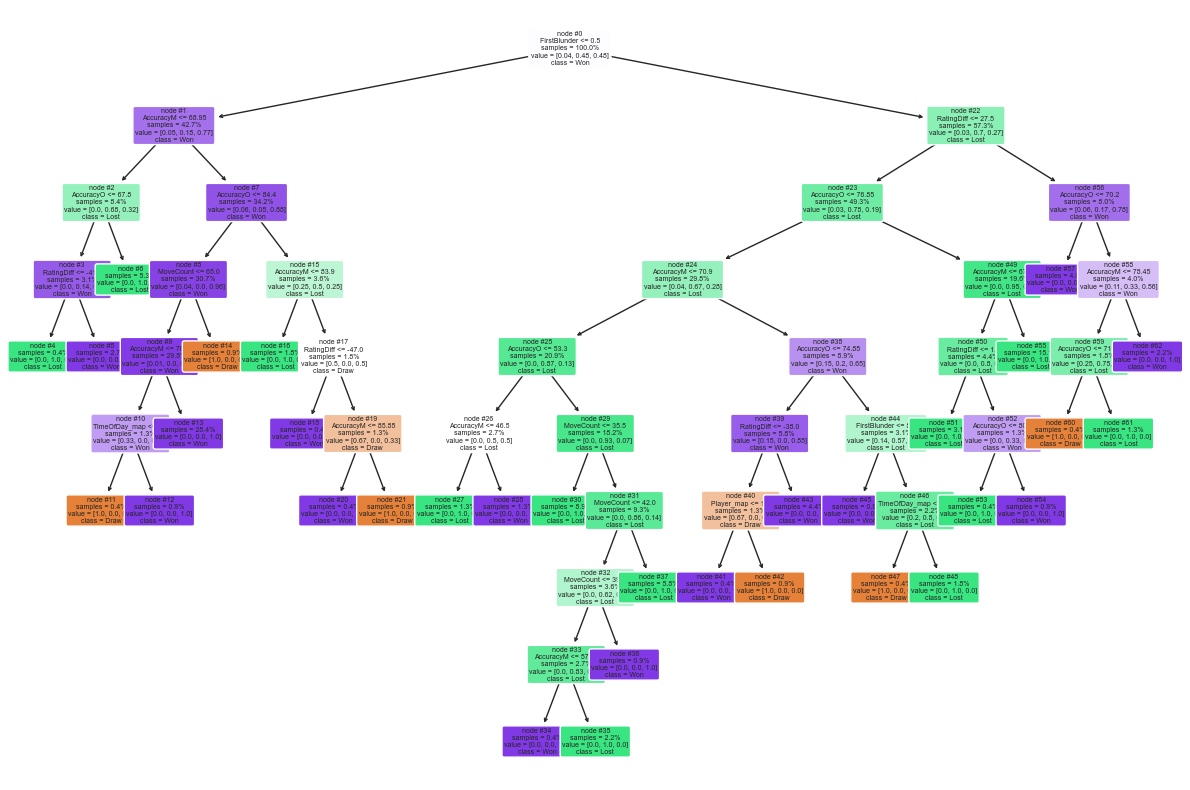

In [371]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Separate dependent variable (y) and independent variables (X)
df_shuffled = shuffle(df, random_state=42)  # Set a random seed for reproducibility

# Separate dependent variable (y) and independent variables (X)
cols = ["FirstBlunder","Opening_map","AccuracyO","AccuracyM","MoveCount","RatingDiff","TimeOfDay_map","Player_map"]

X = df_shuffled[cols]
y = df_shuffled['Result']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree Classifier with chosen hyperparameters

dt_classifier = DecisionTreeClassifier(max_depth=maxDepth, min_samples_split=minSampleSplit)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Convert class names to strings
class_names = [str(class_name) for class_name in dt_classifier.classes_]

print(dt_classifier.classes_)
# Plot the decision tree
plt.figure(figsize=(15, 10))

# Plot the decision tree with enhanced features
plot_tree(dt_classifier, 
          feature_names=X.columns, 
          class_names=class_names, 
          filled=True, 
          rounded=True, 
          fontsize=5,  # Adjust font size
          impurity=False,  # Remove impurity information
          proportion=True,  # Show proportions instead of counts
          precision=2,  # Set precision for displayed values
          node_ids=True,  # Show node IDs
          )
          
plt.show()


In [372]:

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")


Classification Accuracy: 85.96%


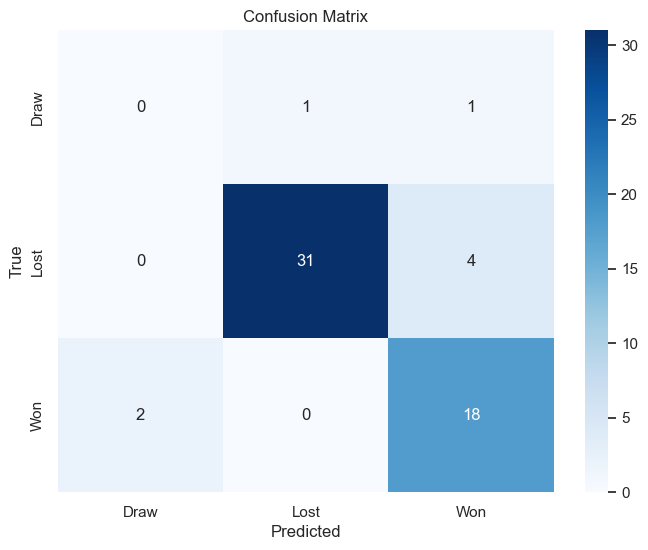

0.5 mistakes: 1
0.5 mistakes: 1
0.0 mistakes: 0
0.11428571428571428 mistakes: 4
0.1 mistakes: 2
0.0 mistakes: 0
The model most frequently mistakes class Draw for class Lost.


In [373]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Plot and investigate the confusion matrix

cm = confusion_matrix(y_test, y_pred)

classes = ['Draw','Lost','Won']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=classes,yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


most_frequent_mistake = None
max_mistakes = 0

for true_class in range(len(classes)):
    for predicted_class in range(len(classes)):
        if true_class != predicted_class:
            mistakes_ratio = cm[true_class, predicted_class] / np.sum(cm[true_class,:],axis=0)
            print(mistakes_ratio,'mistakes:',cm[true_class, predicted_class])
            if mistakes_ratio > max_mistakes:
                max_mistakes = mistakes_ratio
                most_frequent_mistake = (classes[true_class], classes[predicted_class])

print(f"The model most frequently mistakes class {most_frequent_mistake[0]} for class {most_frequent_mistake[1]}.")

